In [25]:
import torch
print(torch.__version__)
!pip3 install scikit-learn
!pip3 install matplotlib
import sklearn
from sklearn import datasets

2.9.0+cpu


## Перцептрон в PyTorch

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split  # Добавьте эту строку!

# в переменную будет сохранён объект «набор данных «Ирисы Фишера»
data = datasets.load_iris()
X = torch.tensor(data['data'])
y = torch.tensor(data['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nОбучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")


Обучающая выборка: torch.Size([120, 4])
Тестовая выборка: torch.Size([30, 4])


In [27]:
from collections import OrderedDict
import torch.nn as nn

# Реализуем модель нейронной сети
model = nn.Sequential(OrderedDict([
    ('hidden_layer', nn.Linear(4, 10)),      # Вход: 4 признака -> скрытый слой: 10 нейронов
    ('activation', nn.ReLU()),                # Функция активации ReLU
    ('output_layer', nn.Linear(10, 3)),       # Выходной слой: 3 нейрона (по числу классов)
    ('log_softmax', nn.LogSoftmax(dim=1))     # LogSoftmax для получения вероятностей классов
]))
model = model.to(dtype=X.dtype)

print("Модель создана:")
print(model)

Модель создана:
Sequential(
  (hidden_layer): Linear(in_features=4, out_features=10, bias=True)
  (activation): ReLU()
  (output_layer): Linear(in_features=10, out_features=3, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)


## Обучение нейросети

In [28]:
from collections import OrderedDict

model = torch.nn.Sequential(
    OrderedDict([
        ("linear_1", torch.nn.Linear(4, 10)),
        ("activation_1", torch.nn.ReLU()),
        ("linear_2", torch.nn.Linear(10, 3)),
        ("log_softmax", torch.nn.LogSoftmax(dim=1)),
    ])
)
model = model.to(dtype=X.dtype)

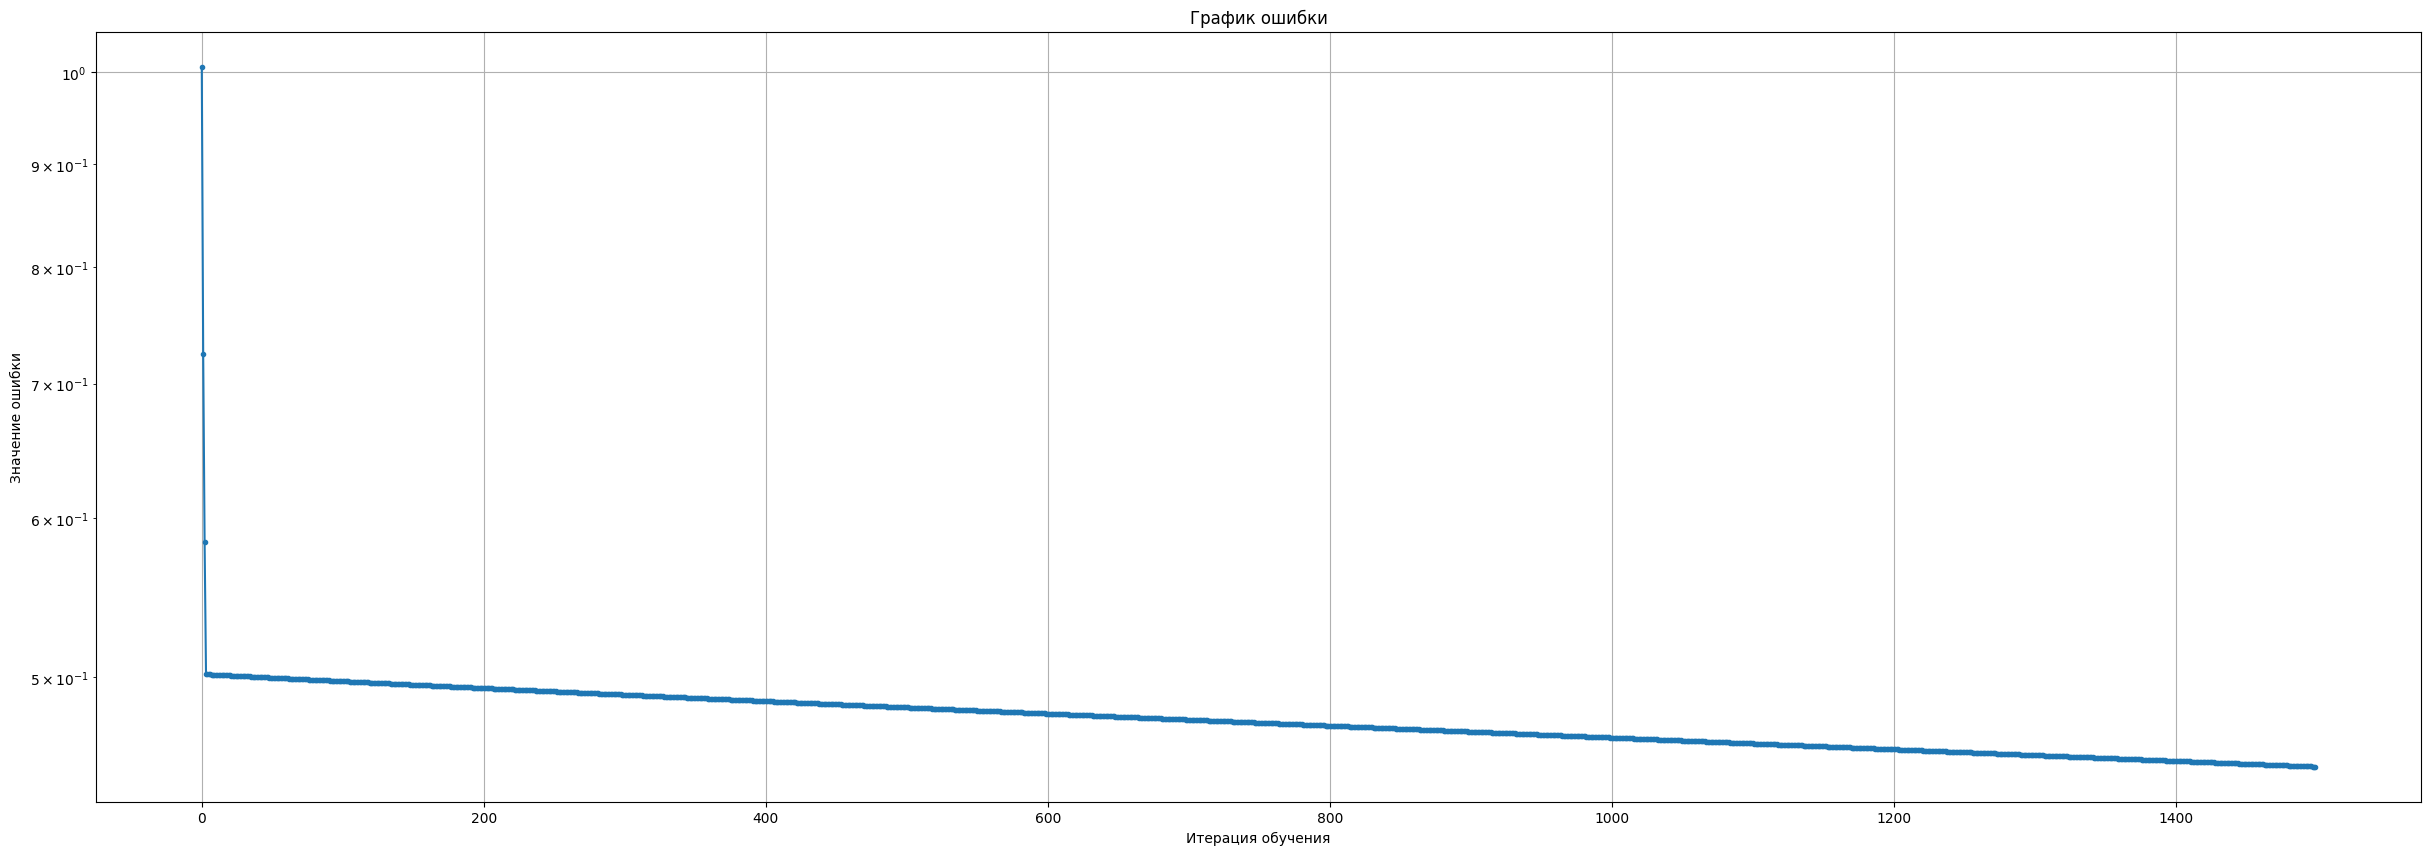

In [33]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# Число итераций обучения (больше 1000)
num_epochs = 1500

# Создаем оптимизатор SGD
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Задаем функцию потерь
loss_fn = torch.nn.NLLLoss()

losses = []
test_accuracy_history = []

for epoch in range(1, num_epochs + 1):
    # Обнуляем градиенты
    optimizer.zero_grad()

    # Предсказание модели для объектов из матрицы X
    pred = model(X_train)

    # Суммарные потери для предсказанных значений из pred
    loss = loss_fn(pred, y_train)

    # Рассчет градиентов loss по всем параметрам модели
    loss.backward()

    # Шаг оптимизации
    optimizer.step()

    losses.append(loss.item())

    with torch.no_grad():
      test_preds = model.forward(X_test)
      accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
      test_accuracy_history.append(accuracy)

    if epoch % 100 == 0:
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title("График ошибки")
        plt.plot(losses, ".-")
        plt.xlabel("Итерация обучения")
        plt.ylabel("Значение ошибки")
        plt.yscale("log")
        plt.grid()
        plt.show()

In [34]:
# Получаем предсказания модели для тестовой выборки
log_probs = model(X_test)

# Находим класс с максимальной вероятностью для каждого объекта
y_pred = torch.argmax(log_probs, dim=1)
print(f"Предсказанные классы для тестовой выборки:")
print(y_pred)
print(f"Размерность: {y_pred.shape}")


Предсказанные классы для тестовой выборки:
tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])
Размерность: torch.Size([30])


In [35]:
# Получаем предсказания модели на тестовой выборке
model.eval()  # Переводим модель в режим оценки
with torch.no_grad():  # Отключаем вычисление градиентов
    log_probs = model(X_test)
    pred_class = torch.argmax(log_probs, dim=1)

# Выводим предсказания для каждого объекта
print("Предсказанные классы для тестовой выборки:")
print(pred_class)
print()

# Выводим детализацию по каждому объекту
print("Детализация по объектам:")
for i in range(len(X_test)):
    true = y_test[i].item()
    pred = pred_class[i].item()
    status = "✓" if true == pred else "✗"
    print(f"Объект {i}: Истина = {true}, Предсказание = {pred} {status}")

# Считаем точность модели
accuracy = (pred_class == y_test).float().mean().item()
print(f"\nТочность модели на тестовой выборке: {accuracy*100:.2f}%")

# Альтернативный способ подсчёта правильных ответов
correct = (pred_class == y_test).sum().item()
total = len(y_test)
print(f"Правильно предсказано: {correct} из {total} ({correct/total*100:.1f}%)")

Предсказанные классы для тестовой выборки:
tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])

Детализация по объектам:
Объект 0: Истина = 1, Предсказание = 1 ✓
Объект 1: Истина = 0, Предсказание = 0 ✓
Объект 2: Истина = 2, Предсказание = 2 ✓
Объект 3: Истина = 1, Предсказание = 1 ✓
Объект 4: Истина = 1, Предсказание = 1 ✓
Объект 5: Истина = 0, Предсказание = 0 ✓
Объект 6: Истина = 1, Предсказание = 1 ✓
Объект 7: Истина = 2, Предсказание = 2 ✓
Объект 8: Истина = 1, Предсказание = 1 ✓
Объект 9: Истина = 1, Предсказание = 1 ✓
Объект 10: Истина = 2, Предсказание = 2 ✓
Объект 11: Истина = 0, Предсказание = 0 ✓
Объект 12: Истина = 0, Предсказание = 0 ✓
Объект 13: Истина = 0, Предсказание = 0 ✓
Объект 14: Истина = 0, Предсказание = 0 ✓
Объект 15: Истина = 1, Предсказание = 1 ✓
Объект 16: Истина = 2, Предсказание = 2 ✓
Объект 17: Истина = 1, Предсказание = 1 ✓
Объект 18: Истина = 1, Предсказание = 1 ✓
Объект 19: Истина = 2, Предсказание 

1. Здесь я попробовал разные функции активации : Tanh дал точность на этой выборке 90%, ReLU уже 96%.

2. Здесь экземпляры из датасета берутся случайным образом и обычно качество данной нейросети получается порядка 95-100%

3. Я попробовал также использовать другие оптимизаторы, они дают иногда очень забавные результаты : например, SGD momentum с импульсом вообще не сходится к верному значению и пытается убежать из верного обучения, так что он не работает для малых нейросетей.

4. Также можно ввести прекращение обучения по достижении некоторого предела точности : 95%, 99%, 99,5% ... В данном сценарии я не пытался этого сделать и просто выставил заранее 1500 эпох обучения.

5. В данной работе достаточно иметь 10 внутренних скрытых слоёв в работе программы, большее количество будет излишним, меньшее - недостаточным. А если же попробовать использовать иное количество слоёв на входе или выходе, то нужно больше параметров в выборах, это бессмысленно в рамках данной задачи